https://www.kaggle.com/c/datasciencebowl/data
http://benanne.github.io/2015/03/17/plankton.html


In [1]:
!pip install kaggle

  Running setup.py bdist_wheel for kaggle ... done
  Stored in directory: /content/.cache/pip/wheels/d6/3c/92/375decc0cf0a65b281db3cca9b8e21dc27b8ebc4d1ce29afca
Successfully built kaggle


In [2]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [3]:
!kaggle competitions list

ref                                             deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
imagenet-object-detection-challenge             2029-12-31 07:00:00  Research         Knowledge          0           False  
imagenet-object-detection-from-video-challenge  2029-12-31 07:00:00  Research         Knowledge          0           False  
imagenet-object-localization-challenge          2029-12-31 07:00:00  Research         Knowledge          9           False  
titanic                                         2020-04-07 00:00:00  Getting Started  Knowledge      11269            True  
house-prices-advanced-regression-techniques     2020-03-01 23:59:00  Getting Started  Knowledge       5430           False  
digit-recognizer                                2020-01-07 00:00:00  Getting Started  Knowledge       2505           False  


In [1]:
!pwd

/content


In [3]:
!ls -l
%cd ./datalab/
!ls -l

total 4
drwxr-xr-x 1 root root 4096 May 21 17:02 datalab
/content/datalab
total 0


In [3]:
!kaggle competitions download -c datasciencebowl -p ./plankton

sampleSubmission.csv.zip: Downloaded 886KB of 886KB to ./plankton
train.zip: Downloaded 76MB of 76MB to ./plankton
test.zip: Downloaded 347MB of 347MB to ./plankton
plankton_identification.pdf: Downloaded 2MB of 2MB to ./plankton


In [ ]:
%mkdir /content/plankton/validation/

In [5]:
%ls -l

total 0


In [1]:
import zipfile
import os
data_dir = "/content/plankton"
path_to_data = "/content/plankton/train.zip"
path_to_data

'/content/plankton/train.zip'

In [ ]:
import io, os
if os.path.exists(data_dir) == False:
    os.makedirs(data_dir)

In [ ]:
zip_ref = zipfile.ZipFile(path_to_data, 'r')
zip_ref.extractall(data_dir)
zip_ref.close()

In [8]:
path_to_test = "/content/plankton/test.zip"
path_to_test

'/content/plankton/test.zip'

In [ ]:
 os.makedirs(data_dir + "/test")

In [ ]:
zip_ref = zipfile.ZipFile(path_to_test, 'r')
zip_ref.extractall(data_dir + "/test")
zip_ref.close()

In [ ]:
validation_dir = os.path.join(data_dir, 'validation')
if os.path.exists(validation_dir) == False:
    os.mkdir(validation_dir)

In [ ]:
import shutil
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
validation_dir = os.path.join(data_dir, 'validation')


In [ ]:

dir_info = [x for x in os.walk(train_dir)]
for dir in dir_info[1:]:
    #print(len(dir[2]))
    validation_number = int(round(len(dir[2])/20))
    #print(validation_number)
    #print(dir[2])
    #print(dir[2][:validation_number])
    dir_name = os.path.split(dir[0])[1]
    #print(dir_name)
    validation_dir_current = os.path.join(validation_dir, dir_name)
    if os.path.exists(validation_dir_current) == False:
        os.mkdir(validation_dir_current)
    for fname in dir[2][:validation_number]:
        src = os.path.join(train_dir, dir_name, fname)
        dst = os.path.join(validation_dir_current, fname)
        #print(src)
        #print(dst)
        shutil.move(src, dst)


In [ ]:
if os.path.exists(validation_dir) == False:
    print("false")

In [3]:
print('total training categories:', len(os.listdir(train_dir)))
cpt = sum([len(files) for r, d, files in os.walk(train_dir)])
print('all train images: ',cpt )

total training categories: 121
all train images:  28813


In [4]:
print('total validation categories:', len(os.listdir(validation_dir)))
cpt = sum([len(files) for r, d, files in os.walk(validation_dir)])
print('all validation images: ',cpt )

total validation categories: 121
all validation images:  1523


In [ ]:
size_of_image = (150, 150)

In [25]:
from keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot
import numpy as np
def apply_to_images_in_subdirs(parent_dir, num_per_cls=None):
    results = []
    for cls_dir_name in os.listdir(parent_dir):
        cls_dir = os.path.abspath(os.path.join(parent_dir, cls_dir_name))
        r = _apply_to_first_n_in_dir(cls_dir, num_per_cls)
        results += r
    return results
def _apply_to_first_n_in_dir(dir_, num_per_cls):
    if not os.path.isdir(dir_):
        return []
    results = []
    for path in os.listdir(dir_)[:num_per_cls]:
        result = img_to_array(load_img(os.path.abspath(os.path.join(dir_, path)),grayscale=True, target_size=size_of_image))
        results.append(result)
    return results
  
from keras.preprocessing.image import ImageDataGenerator
#train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
#     rescale=1./255,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    )
validation_datagen = ImageDataGenerator(
#     rescale=1./255
    featurewise_center=True,
    featurewise_std_normalization=True,

)

images_to_fit = apply_to_images_in_subdirs(train_dir, num_per_cls=10)
print(type(images_to_fit))
print(images_to_fit[0].shape)
train_datagen.fit(images_to_fit,augment=True, seed=1)
validation_datagen.fit(images_to_fit,augment=True, seed=1)
#del images_to_fit
#import gc
#gc.collect()
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=size_of_image,
batch_size=32,
color_mode='grayscale',
class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
validation_dir,
target_size=size_of_image,
batch_size=32,
color_mode='grayscale',
class_mode='categorical')


<class 'list'>
(150, 150, 1)
Found 28813 images belonging to 121 classes.
Found 1523 images belonging to 121 classes.


In [ ]:
from matplotlib import pyplot
print(train_generator.batch_size)
print(type(train_generator.next()))
(q,w)=train_generator.next()
print(type(q[0]))
print(q[2].shape)
pyplot.imshow(q[4].reshape(size_of_image),  cmap=pyplot.get_cmap('gray'))
pyplot.show()
q[4]

In [50]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((3, 3),strides=2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((3, 3),strides=2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3),strides=2))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3),strides=2))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(121, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 69, 69, 64)        36928     
_________________________________________________________________
dropout_14 (Dropout)         (None, 69, 69, 64)        0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 128)       73856     
__________

In [ ]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.Adam(lr=0.0001),
metrics=['acc'])

In [52]:
history = model.fit_generator(
train_generator,
epochs=3,
validation_data=validation_generator)
model.save('/content/plankton/plankton_1.h5')

Epoch 1/3
901/901 [==============================] - 107s 119ms/step - loss: 3.6538 - acc: 0.1572 - val_loss: 3.3662 - val_acc: 0.1911
Epoch 2/3
 82/901 [=>............................] - ETA: 1:28 - loss: 3.1649 - acc: 0.2283901/901 [==============================] - 101s 112ms/step - loss: 2.9506 - acc: 0.2678 - val_loss: 2.8217 - val_acc: 0.3099
Epoch 3/3
158/901 [====>.........................] - ETA: 1:20 - loss: 2.7108 - acc: 0.3081901/901 [==============================] - 103s 114ms/step - loss: 2.5912 - acc: 0.3327 - val_loss: 2.4456 - val_acc: 0.3762


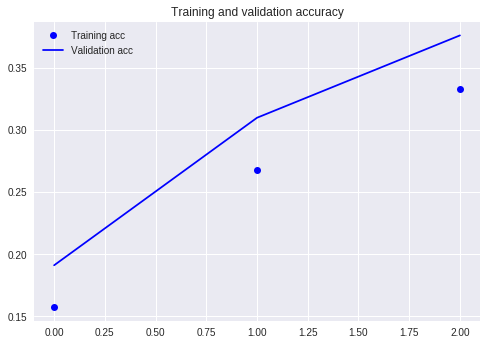

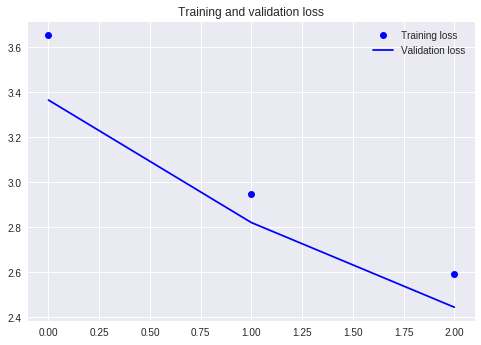

In [53]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [41]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [54]:
print(test_dir)
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(
#     rescale=1./255,
 featurewise_center=True,
    featurewise_std_normalization=True,
)
test_datagen.fit(images_to_fit)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=size_of_image,
        color_mode='grayscale',
        classes=None,
        class_mode=None)


/content/plankton/test
Found 130400 images belonging to 1 classes.


In [42]:
from keras.models import load_model
saved_model = load_model('plankton_1.h5')

OSError: ignored

In [ ]:
import numpy as np
res = model.predict_generator(test_generator)


In [28]:
len(test_generator.filenames)

130400

In [29]:
res[100][5]

0.00034593136

In [56]:
import pandas as pd
image_index = [x.replace("test/","") for x in test_generator.filenames]
df = pd.DataFrame(data=res, columns=[*train_generator.class_indices],index=image_index)
df.head()

,acantharia_protist,acantharia_protist_big_center,acantharia_protist_halo,amphipods,appendicularian_fritillaridae,appendicularian_s_shape,appendicularian_slight_curve,appendicularian_straight,artifacts,artifacts_edge,...,trichodesmium_tuft,trochophore_larvae,tunicate_doliolid,tunicate_doliolid_nurse,tunicate_partial,tunicate_salp,tunicate_salp_chains,unknown_blobs_and_smudges,unknown_sticks,unknown_unclassified
1.jpg,0.000193,0.000145,0.000765,0.001029,0.005125,0.107251,0.114428,0.022046,0.000060,0.000013,...,0.023481,0.000309,0.003216,0.013004,0.000043,0.000198,0.000375,0.006327,0.028649,0.010542
10.jpg,0.013733,0.018464,0.224599,0.001012,0.001653,0.004681,0.009117,0.031105,0.000148,0.007908,...,0.003069,0.009313,0.003609,0.004129,0.003022,0.001732,0.003574,0.001062,0.000691,0.019713
100.jpg,0.000898,0.001823,0.010953,0.000640,0.002939,0.016365,0.037106,0.031725,0.000131,0.000413,...,0.003499,0.012740,0.047473,0.041756,0.000401,0.004227,0.006629,0.001981,0.001828,0.022883
1000.jpg,0.412133,0.000381,0.064768,0.000002,0.000007,0.000045,0.000057,0.000366,0.000347,0.001395,...,0.000015,0.001429,0.000076,0.000031,0.000001,0.000009,0.000018,0.000026,0.000008,0.001487
10000.jpg,0.000042,0.000301,0.001617,0.000277,0.001482,0.040094,0.011884,0.006385,0.000013,0.000036,...,0.000541,0.001698,0.113013,0.015823,0.000194,0.002289,0.003649,0.002114,0.001183,0.020545


In [57]:
df.index.name = 'image'
df.head()

,acantharia_protist,acantharia_protist_big_center,acantharia_protist_halo,amphipods,appendicularian_fritillaridae,appendicularian_s_shape,appendicularian_slight_curve,appendicularian_straight,artifacts,artifacts_edge,...,trichodesmium_tuft,trochophore_larvae,tunicate_doliolid,tunicate_doliolid_nurse,tunicate_partial,tunicate_salp,tunicate_salp_chains,unknown_blobs_and_smudges,unknown_sticks,unknown_unclassified
image,,,,,,,,,,,,,,,,,,,,,
1.jpg,0.000193,0.000145,0.000765,0.001029,0.005125,0.107251,0.114428,0.022046,0.000060,0.000013,...,0.023481,0.000309,0.003216,0.013004,0.000043,0.000198,0.000375,0.006327,0.028649,0.010542
10.jpg,0.013733,0.018464,0.224599,0.001012,0.001653,0.004681,0.009117,0.031105,0.000148,0.007908,...,0.003069,0.009313,0.003609,0.004129,0.003022,0.001732,0.003574,0.001062,0.000691,0.019713
100.jpg,0.000898,0.001823,0.010953,0.000640,0.002939,0.016365,0.037106,0.031725,0.000131,0.000413,...,0.003499,0.012740,0.047473,0.041756,0.000401,0.004227,0.006629,0.001981,0.001828,0.022883
1000.jpg,0.412133,0.000381,0.064768,0.000002,0.000007,0.000045,0.000057,0.000366,0.000347,0.001395,...,0.000015,0.001429,0.000076,0.000031,0.000001,0.000009,0.000018,0.000026,0.000008,0.001487
10000.jpg,0.000042,0.000301,0.001617,0.000277,0.001482,0.040094,0.011884,0.006385,0.000013,0.000036,...,0.000541,0.001698,0.113013,0.015823,0.000194,0.002289,0.003649,0.002114,0.001183,0.020545


In [58]:
df.to_csv("/content/plankton/result.csv", encoding='utf-8',index=image_index)
result2 = pd.read_csv('/content/plankton/result.csv')
result2.columns

Index(['image', 'acantharia_protist', 'acantharia_protist_big_center',
       'acantharia_protist_halo', 'amphipods', 'appendicularian_fritillaridae',
       'appendicularian_s_shape', 'appendicularian_slight_curve',
       'appendicularian_straight', 'artifacts',
       ...
       'trichodesmium_tuft', 'trochophore_larvae', 'tunicate_doliolid',
       'tunicate_doliolid_nurse', 'tunicate_partial', 'tunicate_salp',
       'tunicate_salp_chains', 'unknown_blobs_and_smudges', 'unknown_sticks',
       'unknown_unclassified'],
      dtype='object', length=122)

In [59]:
!kaggle competitions submit -c datasciencebowl -f /content/plankton/result.csv -m "Adam(lr=0.0001) 3 epoch gray scale  featurewise_center=True, featurewise_std_normalization=True more layers"

Successfully submitted to National Data Science Bowl

In [35]:
from google.colab import files
files.download('/content/plankton/plankton_1.h5')

KeyboardInterrupt: ignored